# Analytical SLD profiles

## Oscillatory profile

Use `refnx.reflect.FunctionalForm` to describe an oscillating SLD profile that can be used to describe the surface of a liquid metal.
See "X-ray reflectivity study of temperature-dependent surface layering in liquid Hg", DiMasi, Tostmann, Ocko, Pershan, Deutsch, Phys Rev B, 58. [10.1103/PhysRevB.58.R13419](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.58.R13419) for further details

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from refnx.analysis import Parameter
from refnx.reflect import SLD, Slab, FunctionalForm, ReflectModel

`FunctionalForm` requires a callable of signature `profile(z, extent, left_sld, right_sld, **kwds)`. `kwds` is used to supply parameters describing the shape of the profile. `left_sld`, `right_sld` provide the SLDs of the structure to the left and right of the Component. `extent` is the total width of the Component. `z` is an array provided to `profile`, a list of distances at which the function needs to return a (possibly complex) SLD. `profile` needs to return a tuple `(sld, vfsolv)`, where `sld` is an array of the same shape as `z`, and `vfsolv` is the volume fraction of solvent at each point in z. If `sld` already incorporates a solvent contribution, then return `(sld, None)`.

For further details see [FunctionalForm](https://refnx.readthedocs.io/en/latest/refnx.reflect.html#refnx.reflect.FunctionalForm). 

In [119]:
def rho(z, extent, left_sld, right_sld, d=2.72, sigma_t=1.0, sigma_bar=0.46, offset=5):
    # d, sigma_t, sigma_bar are parameters that describe the shape of the profile
    def term(n):
        sigma_n = n * sigma_bar**2 + sigma_t**2
        prefactor = d / sigma_n / np.sqrt(2 * np.pi)
        return prefactor * np.exp(-0.5 * ((z - offset - n * d) / sigma_n) ** 2)

    _rho = np.zeros_like(z)
    for i in range(0, 20):
        _rho += term(i)
    return left_sld + _rho * (right_sld - left_sld), None

In [120]:
air = SLD(0)
d2o = SLD(6.36)
sigma_bar = Parameter(0.46, "sigma_bar")
d = Parameter(2.72, "d")
sigma_t = Parameter(1.0, "sigma_t")
offset = Parameter(
    5
)  # don't allow me to vary. It's used because rho needs to be evaluated at negative distances of z.

f = FunctionalForm(
    20,
    rho,
    microslab_max_thickness=0.1,
    sigma_bar=sigma_bar,
    d=d,
    sigma_t=sigma_t,
    offset=offset,
)

In [121]:
s = air | f | d2o(0, 0)

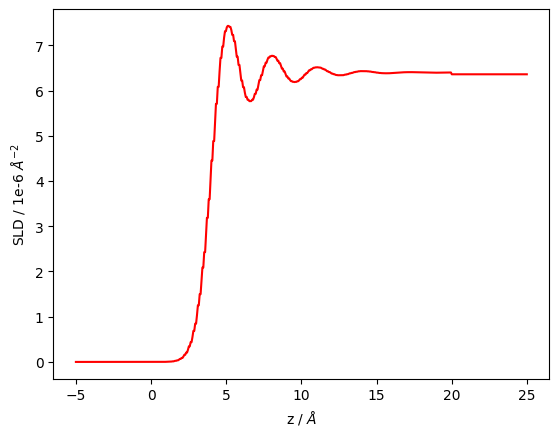

In [122]:
s.plot();